In [2]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick

from cycler import cycler
import sys, os, glob
import pytz

from scipy.signal import *
from scipy.stats import *
from scipy.interpolate import *

# use latex fonts/mathematica color scheme
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family='Computer Modern Roman')

# cyclers for colors and line styles
line_cycle = cycler('linestyle', ["-","-.","--"])

#color_cycle_trimmed = cycler('color', ["#62ad64", "#9750a1", "#b8893a", "#6778d0", "#b8475f"])
color_cycle = cycler('color', ["#62ad64", "#9750a1", "#b8893a", "#6778d0", "#b8475f"])
clrs = ["#62ad64", "#9750a1", "#b8893a", "#6778d0", "#b8475f"]
clrs2 = ["#e18e9c", "#53c0da", "#c0af6f", "#b5a0dd", "#71c19b"]

In [46]:
# Import external RF data
i = 0
output = {}
for i in range(39):
    if i+1<10:
        f_name = 'unit0'+str(i+1)+'_0dbm.DAT'
        unit_tag = '0'+str(i+1)
    else:
        f_name = 'unit'+str(i+1)+'_0dbm.DAT'
        unit_tag = str(i+1)
    # All frequency ranges are the same
    freq, output[unit_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                 skip_header = 29, unpack = True)

In [4]:
# Import VCO data
i = 0
vco = {}
tags = []
for i in range(39):
    if i+1<10:
        f_name = 'unit0'+str(i+1)+'_vco.DAT'
        unit_tag = '0'+str(i+1)
    else:
        f_name = 'unit'+str(i+1)+'_vco.DAT'
        unit_tag = str(i+1)
    # All frequency ranges are the same
    try:
        freq_vco, vco[unit_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        vco[unit_tag]+=30
        tags.append(unit_tag)
    except (OSError, IOError):
        continue

In [5]:
# Import Harmonic Data
i = 0
Harm = {}
for i in range(3):
    f_name = 'unit29_'+str(i*5)+'dbm.DAT'
    p_tag = '1,'+str(i*5)
    try:
        freq_1st, Harm[p_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        Harm[p_tag]+=i*5
    except (OSError, IOError):
        continue
for i in range(3):
    f_name = 'unit29_'+str(i*5)+'dbm_2ndH.DAT'
    p_tag = '2,'+str(i*5)
    try:
        freq_2nd, Harm[p_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        Harm[p_tag]+=i*5
    except (OSError, IOError):
        continue
for i in range(3):
    f_name = 'unit29_'+str(i*5)+'dbm_3rdH.DAT'
    p_tag = '3,'+str(i*5)
    try:
        freq_3rd, Harm[p_tag], dump = np.genfromtxt(f_name, delimiter = ';',
                                                      skip_header = 29, unpack = True)
        Harm[p_tag]+=i*5
    except (OSError, IOError):
        continue

In [48]:
output_2d = np.array([output[tag] for tag in output.keys()])
freq_2d = np.array([freq for tag in output.keys()])

In [49]:
WattLine = np.array([30 for i in range(len(freq))])
WattLine2 = np.array([37 for i in range(len(freq))])

In [15]:
df_vco = pd.DataFrame()
pwr_ = []
freq_ = []
for tag in tags:
    pwr_.append(np.max(vco[tag]))
    freq_.append(np.around(freq_vco[np.argmax(vco[tag])]/10**6, -1))
df_vco['pwr'] = pwr_
df_vco['freq'] = freq_
print(df_vco.groupby('freq').mean())
print(df_vco.groupby('freq').std())
df_vco

             pwr
freq            
40.0   37.255576
80.0   36.636888
200.0  35.626821
400.0  32.685908
800.0  31.294173
            pwr
freq           
40.0   0.110870
80.0   0.176488
200.0  0.120519
400.0       NaN
800.0  0.756249


,pwr,freq
0,36.706127,80.0
1,37.251607,40.0
2,35.518718,200.0
3,35.568571,200.0
4,36.773145,80.0
5,36.564830,80.0
6,37.092783,80.0
7,36.597766,80.0
8,36.270102,80.0
9,36.746335,80.0


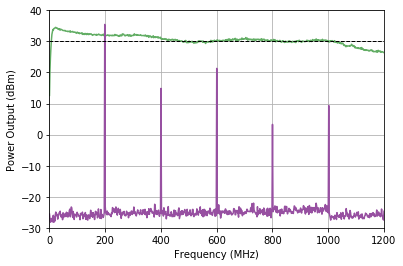

In [23]:
matplotlib.rc('axes', prop_cycle=color_cycle)
tag = '28'
plt.figure(1)
plt.plot(freq/10**6, output[tag], '-')
if tag in vco.keys():
    plt.plot(freq_vco/10**6, vco[tag], '-')
plt.plot(freq/10**6, WattLine, 'k--', linewidth = 1.0)
plt.ylim(-30,40)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power Output (dBm)')
plt.xlim(0.0,1200)
plt.grid()
plt.show()

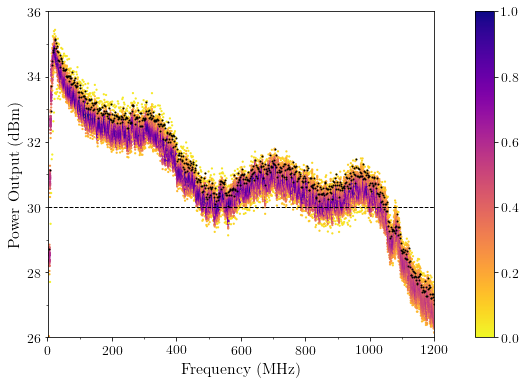

In [51]:
colorMap = []
i = 0
for i in range(int(output_2d.shape[1])):
    gs = gaussian_kde(output_2d[:, i])
    colorMap.extend(gs(output_2d[:, i]))
c = colorMap/np.max(colorMap)
cnorm = matplotlib.colors.Normalize(vmin=np.min(c), vmax = np.max(c))

fig = plt.figure()
fig.set_size_inches((8,6))

gs = gridspec.GridSpec(1, 2, width_ratios=[20, 1])
ax = fig.add_subplot(gs[0,0])
color_ax = plt.subplot(gs[0,1])

sc = ax.scatter(freq_2d.flatten(order='F')/10**6, output_2d.flatten(order='F'), \
                c=c, s=5, edgecolors='', cmap='plasma_r', norm=cnorm, vmin = 0, vmax = 1)
ax.plot(freq/(10**6), WattLine, 'k--', linewidth = 1.0)
ax.scatter(freq/(10**6), output['29'], color = 'black', s = 1)
ax.set_ylim(26,36)
ax.set_xlim(1,1200)
ax.set_xlabel('Frequency (MHz)', fontsize = 16)
ax.set_ylabel('Power Output (dBm)', fontsize = 16)
ax.tick_params(labelsize = 14)
ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
fig.colorbar(sc, cax=color_ax)
color_ax.tick_params(labelsize = 14)
plt.savefig('Figures/PowerDistribution.png', dpi=300, bbox_inches='tight')
plt.savefig('Figures/PowerDistribution.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('Figures/PowerDistribution.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

-11.2977752686
-16.461101532
-13.1576652527
-13.2159080505
-12.547586441
-10.8427095413


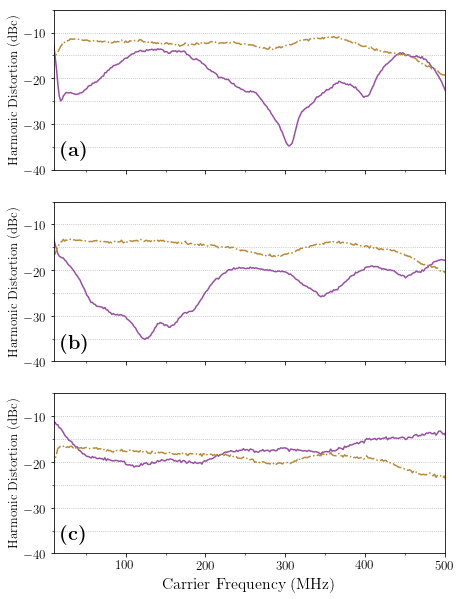

9.6884057971


In [8]:
fig = plt.figure()
fig.set_size_inches((7,10))
gs = gridspec.GridSpec(3, 1, height_ratios=[1,1,1])

ax = []
i = 0
for i in range(3):
    if i == 0:
        ax.append(fig.add_subplot(gs[2-i,0]))
    else:
        ax.append(fig.add_subplot(gs[2-i,0], sharex = ax[0]))
        plt.setp(ax[i].get_xticklabels(), visible=False)
    ax[i].plot(freq_1st/(10**6), Harm['2,'+str(i*5)]-Harm['1,'+str(i*5)], color = clrs[1], linestyle = '-')
    ax[i].plot(freq_1st/(10**6), Harm['3,'+str(i*5)]-Harm['1,'+str(i*5)], color = clrs[2], linestyle = '-.')
    print(np.max(Harm['2,'+str(i*5)][5:]-Harm['1,'+str(i*5)][5:]))
    print(np.max(Harm['3,'+str(i*5)][5:]-Harm['1,'+str(i*5)][5:]))
    #ax[i].plot(freq/(10**6), WattLine, 'k--', linewidth = 1.0)
    #ax[i].plot(freq/(10**6), WattLine2, 'k--', linewidth = 1.0)
    ax[i].set_ylabel('Harmonic Distortion (dBc)', fontsize = 13)
    ax[i].xaxis.set_minor_locator(mtick.AutoMinorLocator(2))
    ax[i].yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
    ax[i].tick_params(labelsize = 13)
    ax[i].set_xlim(10,500)
    ax[i].set_ylim(-40,-5)
    ax[i].grid(b=True,which='both',axis='y',linestyle=':')
#plt.plot(freq_1st/(10**6), WattLine, 'k--')
ax[0].set_xlabel('Carrier Frequency (MHz)', fontsize = 16)
fig.text(.14, .6775, r'\textbf{(a)}', fontsize=20)
fig.text(.14, .41, r'\textbf{(b)}', fontsize=20)
fig.text(.14, .145, r'\textbf{(c)}', fontsize=20)
#plt.savefig('Figures/Harmonics.png', dpi=300, bbox_inches='tight')
#plt.savefig('Figures/Harmonics.eps', format='eps', dpi=300, bbox_inches='tight')
#plt.savefig('Figures/Harmonics.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
print(freq_1st[5]/(10**6))

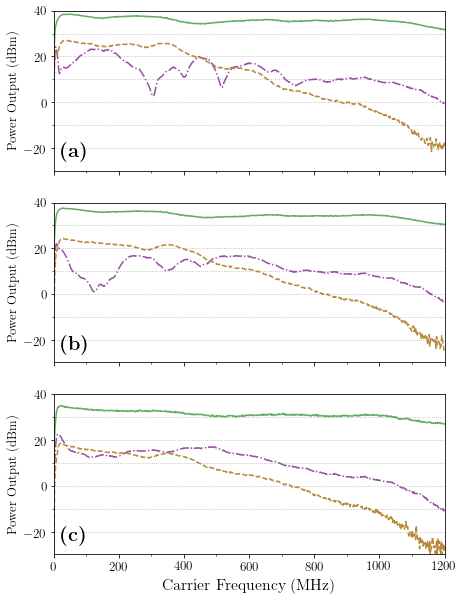

In [28]:
fig = plt.figure()
fig.set_size_inches((7,10))
gs = gridspec.GridSpec(3, 1, height_ratios=[1,1,1])

ax = []
i = 0
for i in range(3):
    if i == 0:
        ax.append(fig.add_subplot(gs[2-i,0]))
    else:
        ax.append(fig.add_subplot(gs[2-i,0], sharex = ax[0]))
        plt.setp(ax[i].get_xticklabels(), visible=False)
    ax[i].plot(freq_1st/(10**6), Harm['1,'+str(i*5)], color = clrs[0], linestyle = '-')
    ax[i].plot(freq_1st/(10**6), Harm['2,'+str(i*5)], color = clrs[1], linestyle = '-.')
    ax[i].plot(freq_1st/(10**6), Harm['3,'+str(i*5)], color = clrs[2], linestyle = '--')
    #ax[i].plot(freq/(10**6), WattLine, 'k--', linewidth = 1.0)
    #ax[i].plot(freq/(10**6), WattLine2, 'k--', linewidth = 1.0)
    ax[i].set_ylabel('Power Output (dBm)', fontsize = 13)
    ax[i].xaxis.set_minor_locator(mtick.AutoMinorLocator(2))
    ax[i].yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
    ax[i].tick_params(labelsize = 13)
    ax[i].set_xlim(1,1200)
    ax[i].set_ylim(-30,40)
    ax[i].grid(b=True,which='both',axis='y',linestyle=':')
#plt.plot(freq_1st/(10**6), WattLine, 'k--')
ax[0].set_xlabel('Carrier Frequency (MHz)', fontsize = 16)
fig.text(.14, .6775, r'\textbf{(a)}', fontsize=20)
fig.text(.14, .41, r'\textbf{(b)}', fontsize=20)
fig.text(.14, .145, r'\textbf{(c)}', fontsize=20)
plt.savefig('Figures/Harmonics.png', dpi=300, bbox_inches='tight')
plt.savefig('Figures/Harmonics.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('Figures/Harmonics.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
def pPeak(df, freqs):
    list_ = []
    freq_dict = {'50MHz' : 50*10**6, '100MHz' : 100*10**6, '500MHz' : 500*10**6, '1GHz' : 10**9}
    for index, freq in enumerate(freqs):
        v_sq = np.power(df['v_envl_'+freq]-df['v_envl-_'+freq], 2)
        p_temp = 10*np.log(v_sq/v_sq[0])
        df['p_pk_'+freq] = p_temp
def envelopes(df, freqs):
    df_temp = pd.DataFrame()
    list_ = []
    freq_dict = {'50MHz' : 50*10**6, '100MHz' : 100*10**6, '500MHz' : 500*10**6, '1GHz' : 10**9}
    for index, freq in enumerate(freqs):
        #analytic_signal = hilbert(df['v_raw_'+freq]-np.mean(df['v_raw_'+freq]))
        bin_size = int(np.ceil((freq_dict[freq]*abs(df['t_raw_'+freq][1]-df['t_raw_'+freq][0]))**(-1))/4)
        filt_size = 12
        filt = np.ones((filt_size,))/filt_size
        sig_in = np.array(df['v_raw_'+freq])
        sig_temp = np.convolve(sig_in, filt, mode = 'valid')
        arg_maxima = argrelextrema(sig_temp, np.greater, order=bin_size)[0]
        arg_minima = argrelextrema(sig_temp, np.less, order=bin_size)[0]
        df_temp['t_'+freq] = df['t_raw_'+freq][max(arg_maxima[0],arg_minima[0]):min(arg_maxima[-1],arg_minima[-1]):]
        sp = UnivariateSpline(df['t_raw_'+freq][arg_maxima], df['v_raw_'+freq][arg_maxima], k=1, s=0)
        df_temp['e+_'+freq] = sp(df_temp['t_'+freq])
        sp = UnivariateSpline(df['t_raw_'+freq][arg_minima], df['v_raw_'+freq][arg_minima], k=1, s=0)
        df_temp['e-_'+freq] = sp(df_temp['t_'+freq])
    df_temp = df_temp.reset_index(drop=True)
    return df_temp

In [11]:
df = pd.DataFrame()
list_ = []
for freq in ['50MHz', '100MHz', '500MHz', '1GHz']:
    for trace in ['raw', 'trig', 'envl','envl-']:
        f_name = 'Switch_'+freq+'_'+trace+'.csv'
        df_temp = pd.read_csv(f_name, header=None, usecols=[3,4], names=['t_'+trace+'_'+freq, 'v_'+trace+'_'+freq])
        list_.append(df_temp)
df = pd.concat(list_, axis=1)

In [12]:
df2 = envelopes(df, ['50MHz', '100MHz', '500MHz', '1GHz'])
pPeak(df, ['50MHz', '100MHz', '500MHz', '1GHz'])

90/10 fall time:
21.476
100/10 switch time:
23.228
full switch time:
40.368
90/10 fall time:
19.836
100/10 switch time:
21.632
full switch time:
38.468
90/10 fall time:
15.864
100/10 switch time:
17.448
full switch time:
35.96
90/10 fall time:
5.332
100/10 switch time:
7.024
full switch time:
34.636


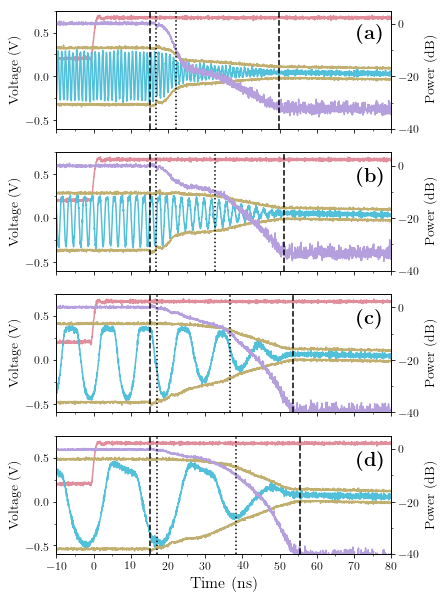

In [43]:
fig = plt.figure()
fig.set_size_inches((6,10))
gs = gridspec.GridSpec(4, 1, height_ratios=[1,1,1,1])

ax = []
twinax = []
freqs = ['50MHz', '100MHz', '500MHz', '1GHz']
i = 0
for i in range(4):
    if i == 0:
        ax.append(fig.add_subplot(gs[3-i,0]))
    else:
        ax.append(fig.add_subplot(gs[3-i,0], sharex = ax[0]))
        plt.setp(ax[i].get_xticklabels(), visible=False)
    for index, trace in enumerate(['trig','raw','envl']):
        ax[i].plot(df['t_'+trace+'_'+freqs[i]][::10]*10**9, df['v_'+trace+'_'+freqs[i]][::10]+0.2*(1-np.sign(index)), \
                   color = clrs2[index], linestyle = '-')
        if trace == 'envl':
            ax[i].plot(df['t_'+trace+'-_'+freqs[i]][::10]*10**9, df['v_'+trace+'-_'+freqs[i]][::10], \
                       color = clrs2[index], linestyle = '-')
    twinax.append(ax[i].twinx())
    twinax[i].plot(df['t_envl_'+freqs[i]][::10]*10**9, df['p_pk_'+freqs[i]][::10], \
                   color = clrs2[3], linestyle = '-')
    rmean = np.convolve(df['p_pk_'+freqs[i]],np.ones((100,))/100, mode='same')
    #twinax[i].plot(df['t_envl_'+freqs[i]][::10]*10**9, rmean[::10], \
    #               color = clrs2[4], linestyle = '-')
    it90 = np.argmax(rmean < -0.45)
    twinax[i].axvline(x=df['t_envl_'+freqs[i]][it90]*10**9, color='black',linewidth = 1.5, linestyle = ':')
    it10 = np.argmax(rmean < -10.0)
    twinax[i].axvline(x=df['t_envl_'+freqs[i]][it10]*10**9, color='black',linewidth = 1.5, linestyle = ':')
    print('90/10 fall time:')
    print(df['t_envl_'+freqs[i]][it10]*10**9-df['t_envl_'+freqs[i]][it90]*10**9)
    m0 = np.mean(df['p_pk_'+freqs[i]][0:3000])
    sd0 = np.std(df['p_pk_'+freqs[i]][0:3000])
    sw0 = np.argmax(np.abs(rmean-m0)>sd0)
    twinax[i].axvline(x=df['t_envl_'+freqs[i]][sw0]*10**9, color='black',linewidth = 1.5, linestyle = '--')
    print('100/10 switch time:')
    print(df['t_envl_'+freqs[i]][it10]*10**9-df['t_envl_'+freqs[i]][sw0]*10**9)
    m0 = np.mean(df['p_pk_'+freqs[i]][-3000:-1])
    sd0 = np.std(df['p_pk_'+freqs[i]][-3000:-1])
    sw100 = np.argmax(np.abs(rmean-m0)<0.5*sd0)
    twinax[i].axvline(x=df['t_envl_'+freqs[i]][sw100]*10**9, color='black',linewidth = 1.5, linestyle = '--')
    print('full switch time:')
    print(df['t_envl_'+freqs[i]][sw100]*10**9-df['t_envl_'+freqs[i]][sw0]*10**9)
    #ax[i].plot(df2['t_'+freqs[i]]*10**9, df2['e+_'+freqs[i]], \
    #           color = clrs2[3], linestyle = '-')
    #ax[i].plot(df2['t_'+freqs[i]]*10**9, df2['e-_'+freqs[i]], \
    #           color = clrs2[4], linestyle = '-')
    ax[i].set_ylabel('Voltage (V)', fontsize = 14)
    twinax[i].set_ylabel('Power (dB)', fontsize = 14)
    ax[i].xaxis.set_minor_locator(mtick.AutoMinorLocator(2))
    ax[i].yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
    twinax[i].yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
    ax[i].set_ylim(-0.6, 0.75)
    ax[i].tick_params(labelsize = 12)
    twinax[i].set_ylim(-40, 5)
    twinax[i].tick_params(labelsize = 12)
    #twinax[i].grid(b=True,which='both',axis='y',linestyle=':')
#ax = fig.add_subplot(gs[0,0])
#twinax = ax.twinx()
ax[0].set_xlim(-10.0, 80.0)
ax[0].set_xlabel('Time (ns)', fontsize = 16)
fig.text(.82, .84, r'\textbf{(a)}', fontsize=20)
fig.text(.82, .6425, r'\textbf{(b)}', fontsize=20)
fig.text(.82, .445, r'\textbf{(c)}', fontsize=20)
fig.text(.82, .2475, r'\textbf{(d)}', fontsize=20)
plt.savefig('Figures/Switching.png', dpi=300, bbox_inches='tight')
plt.savefig('Figures/Switching.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('Figures/Switching.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
dft = pd.DataFrame()
list_ = []
for pin, atten in [('term', '4V'), ('0dbm', '0V'), ('0dbm', '4V')]:
    f_name = 'unit29_'+pin+'_ext_'+atten+'.DAT'
    df_temp = pd.read_csv(f_name, sep=';', header=None, usecols=[0,1], skiprows=29, \
                          names=['f_'+pin+'_'+atten, 'p_'+pin+'_'+atten])
    list_.append(df_temp)
dft = pd.concat(list_, axis=1)

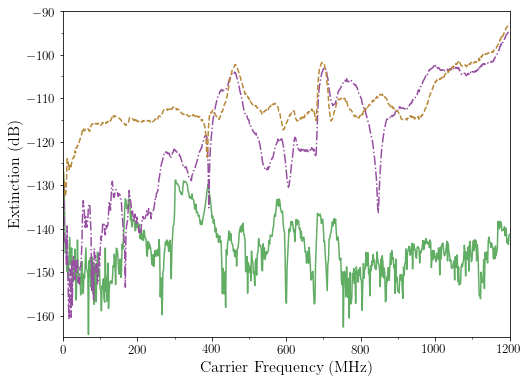

In [32]:
fig = plt.figure()
fig.set_size_inches((8,6))
gs = gridspec.GridSpec(1, 1)

ax = fig.add_subplot(gs[0,0])
ax.plot(dft['f_term_4V']/(10**6), -(Harm['1,0']-dft['p_term_4V']), color = clrs[0], linestyle = '-')
ax.plot(dft['f_0dbm_4V']/(10**6), -(Harm['1,0']-dft['p_0dbm_4V']), color = clrs[1], linestyle = '-.')
ax.plot(dft['f_0dbm_0V']/(10**6), -(Harm['1,0']-dft['p_0dbm_0V']), color = clrs[2], linestyle = '--')
ax.set_ylabel('Extinction (dB)', fontsize = 16)
ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
ax.tick_params(labelsize = 13)
ax.set_xlim(1,1200)
ax.set_ylim(-165,-90)
#plt.plot(freq_1st/(10**6), WattLine, 'k--')
ax.set_xlabel('Carrier Frequency (MHz)', fontsize = 16)
plt.savefig('Figures/Extinction.png', dpi=300, bbox_inches='tight')
plt.savefig('Figures/Extinction.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('Figures/Extinction.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

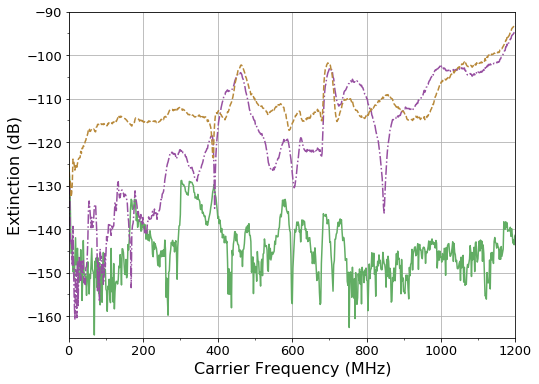

In [35]:
fig = plt.figure()
fig.set_size_inches((8,6))
gs = gridspec.GridSpec(1, 1)

ax = fig.add_subplot(gs[0,0])
ax.plot(dft['f_term_4V']/(10**6), -(Harm['1,0']-dft['p_term_4V']), color = clrs[0], linestyle = '-')
ax.plot(dft['f_0dbm_4V']/(10**6), -(Harm['1,0']-dft['p_0dbm_4V']), color = clrs[1], linestyle = '-.')
ax.plot(dft['f_0dbm_0V']/(10**6), -(Harm['1,0']-dft['p_0dbm_0V']), color = clrs[2], linestyle = '--')
ax.set_ylabel('Extinction (dB)', fontsize = 16)
ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
ax.tick_params(labelsize = 13)
ax.set_xlim(1,1200)
ax.set_ylim(-165,-90)
#plt.plot(freq_1st/(10**6), WattLine, 'k--')
ax.set_xlabel('Carrier Frequency (MHz)', fontsize = 16)
#plt.savefig('Figures/Extinction.png', dpi=300, bbox_inches='tight')
#plt.savefig('Figures/Extinction.eps', format='eps', dpi=300, bbox_inches='tight')
#plt.savefig('Figures/Extinction.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

In [33]:
def prcntTodB(df, amps):
    list_ = []
    for index, amp in enumerate(amps):
        prcnt = df['prcnt_'+amp+'mVpp']
        db_temp = 10*np.log(prcnt/prcnt[6])
        df['dB_'+amp+'mVpp'] = db_temp

In [34]:
dfam = pd.DataFrame()
list_ = []
for amp in ['300', '600', '1500']:
    f_name = 'unit29_AM_'+amp+'mVpp_2Vint.DAT'
    df_temp = pd.read_csv(f_name, sep=';', header=None, usecols=[0,1], skiprows=29, \
                          names=['f_'+amp+'mVpp', 'prcnt_'+amp+'mVpp'])
    list_.append(df_temp)
dfam = pd.concat(list_, axis=1)
prcntTodB(dfam, ['300', '600', '1500'])

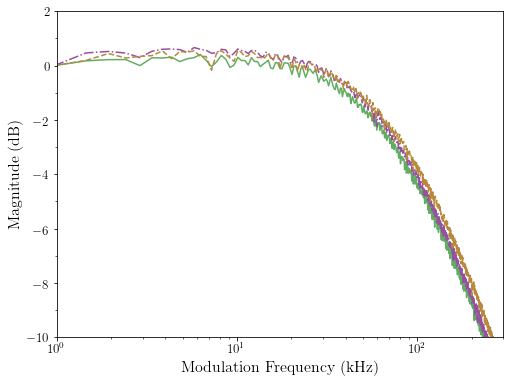

In [35]:
fig = plt.figure()
fig.set_size_inches((8,6))
gs = gridspec.GridSpec(1, 1)

ax = fig.add_subplot(gs[0,0])
start = 6
skip = 3
ax.semilogx(dfam['f_300mVpp'][start::skip]/(10**3), dfam['dB_300mVpp'][start::skip], color = clrs[0], linestyle = '-')
ax.semilogx(dfam['f_600mVpp'][start::skip]/(10**3), dfam['dB_600mVpp'][start::skip], color = clrs[1], linestyle = '-.')
ax.semilogx(dfam['f_1500mVpp'][start::skip]/(10**3), dfam['dB_1500mVpp'][start::skip], color = clrs[2], linestyle = '--')
ax.set_ylabel('Magnitude (dB)', fontsize = 16)
#ax.xaxis.set_minor_locator(mtick.AutoMinorLocator(5))
ax.yaxis.set_minor_locator(mtick.AutoMinorLocator(2))
ax.tick_params(labelsize = 13)
ax.set_xlim(1,300)
ax.set_ylim(-10,2)
ax.set_xlabel('Modulation Frequency (kHz)', fontsize = 16)
plt.savefig('Figures/AMod.png', dpi=300, bbox_inches='tight')
plt.savefig('Figures/AMod.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig('Figures/AMod.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()